시계열 모형에 대한 
#### 모형 차수 결정(model order specification)과 모수 추정(parameter estimation)
이 끝난 다음에는 모형화가 제대로 이루어졌는지를 검사하는 모형 진단(model diagnosis)을 실시해야 한다.

#### 시계열 모형 진단을 위한 가장 기본적인 분석 방법은 잔차 분석(residual analysis)이다.

## 잔차

모형 진단에서 잔차(residual)는 주어진 
#### 시계열을 생성하기 위해 입력되었던 백색 잡음에 대한 추정값을 말한다.

잔차는 주어진  𝑦  값과 모형의 수식과 계수를 이용하여 구한다. 예를 들어 다음과 같은 ARMA(2) 모형의 경우,

$$Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t$$

다음 수식을 이용하여 잔차  𝑒𝑡 를 계산할 수 있다.

$$\hat{e}_t = Y_t - \left( \phi_1 Y_{t-1} + \phi_2 Y_{t-2} \right)$$

잔차는 값  𝑌𝑡 와 모형에서 추정된 이 값에 대한 예측치의 차이라고 볼 수 있다. 따라서 모형이 훌륭하다면 이 값은 더이상 예측할 수 있는 요소가 전혀 없는 시계열 즉, 가우시안 백색 잡음에 가까운 특성을 보여야 한다.

#### 잔차가 가우시안 백색 잡음인지 확인하기 위한 방법은 두가지이다.

+ 잔차 분포의 정규성 검정
+ 잔차의 자기상관계수가  𝑘=0  을 제외하고 모두 0(zero)

## 잔차의 정규성 검정

자료 분석에서 정규분포가 차지하는 비중이 크기 때문에 다음과 같이 많은 정규성 검정 방법이 개발되어 왔다.

+ D'Agostino's K-squared test
+ Shapiro-Wilk test
+ Anderson-Darling tests
+ Jarque-Bera test
+ Lilliefors test
+ Kolmogorov-Smirnov test

#### Python은 SciPy 패키지와 statsmodels 패키지에서 다음과 같은 정규성 검정 명령을 제공한다.

+ scipy.stats 패키지에서 제공하는 정규분포 테스트 함수
    + normaltest: D'Agostino's K-squared test
    + shapiro: Shapiro-Wilk test
    + anderson: Anderson-Darling tests

+ statsmodels 패키지에서 제공하는 정규분포 테스트 함수
    + jarque_bera: Jarque-Bera test
    + lillifors: Lilliefors test
    + normal_ad: Anderson-Darling tests
    + omni_normtest: normaltest 와 동일

### 1. Box-Pierce 검정
Box-Pierce 검정은 차수  𝑘 까지의 ACF 값이 모두 0 이라는 것을 귀무 가설로 하고 있다. 즉  𝑘 가 큰 경우 실질적으로 검정 대상이 되는 시계열이 백색 잡음이라는 것을 귀무 가설로 하는 것과 같다.

Box-Pierce 검정에 사용되는 검정 통계량은 Q-value라고 하며 다음과 같이 정의된다.

$$Q = n(\hat{r}_1^2 + \hat{r}_2^2 + \cdots + \hat{r}_k^2 )$$

이 검정통계량은 ARMA(p,q) 확률 과정에 대해 자유도가  𝑘−𝑝−𝑞  카이 제곱(Chi-square) 분포를 따른다.

### 2. Ljung-Box 검정

#### Ljung-Box 검정은 Box-Pierce 검정의 정확도를 개선한 검정 방법이다. 따라서 현재는 Box-Pierce 검정 대신 Ljung-Box 검정이 쓰인다.

Ljung-Box 검정의 검정 통계량은 다음과 같이 정의된다.

$$Q_{\ast} = n(n+2)\left(\dfrac{\hat{r}_1^2}{n-1} + \dfrac{\hat{r}_2^2}{n-2} + \cdots + \dfrac{\hat{r}_k^2}{n-k} \right)$$

#### statsmodels 패키지는 Ljung-Box 검정을 위한 statsmodels.stats.diagnostic.acorr_ljungbox 명령을 제공한다.

## 실제 시계열 잔차 분석의 예

황체형성 호르몬 모형의 경우에 대해 잔차를 분석한다.

In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

import statsmodels.api as sm

In [2]:
data = sm.datasets.get_rdataset('lh')
df = data.data

m = sm.tsa.ARMA(df.value, (1, 0)) # AR(1) 모형에 대한 모수 추정
r = m.fit()

잔차는 다음과 같다.

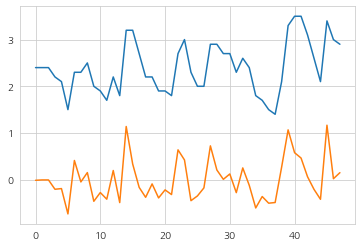

In [6]:
plt.plot(df.value)
plt.plot(r.resid) # 잔차
plt.show()

우선 잔차의 정규성을 확인하기 위해 QQ-Plot을 그린다.

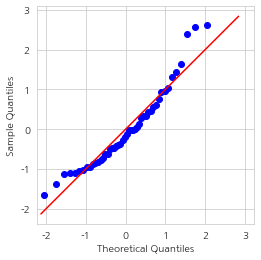

In [9]:
sm.qqplot(r.resid, fit=True, line='45')
plt.gca().axis("square")
plt.show()

In [10]:
import scipy as sp
import scipy.stats

정규성 검정 결과는 다음과 같다. p-value가 2% 수준이므로 정규분포라고 볼 수 없다.

In [14]:
sp.stats.normaltest(r.resid)

NormaltestResult(statistic=7.595559718857261, pvalue=0.02242049328823745)

이제 잔차의 샘플 자기상관계수 함수를 살펴보자.

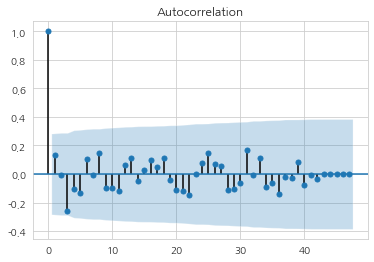

In [31]:
sm.graphics.tsa.plot_acf(r.resid, lags=(len(df)-1))
plt.show()

Ljung-Box 검정 결과는 다음과 같다. 시차 20까지의 모든 p-value 가 50% 이상이므로 ACF가 0이라는 귀무가설을 받아들일 수 있다.

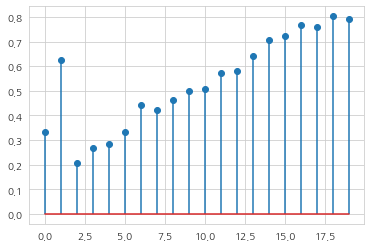

In [35]:
qvalue, pvalue = sm.stats.acorr_ljungbox(r.resid, 20)
plt.stem(pvalue, use_line_collection=True)
plt.show()

이번에는 결정론적 계절성을 가지는 호흡기질환 사망자수의 모형을 보자.

In [36]:
data = sm.datasets.get_rdataset('deaths', 'MASS')
df = data.data
df['logvalue'] = np.log(df.value)

def yearfraction2datetime(yearfraction, startyear=0):
    import datetime
    import dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

df["datetime"] = df.time.map(yearfraction2datetime)
df["month"] = df.datetime.dt.month

In [39]:
result = sm.OLS.from_formula('logvalue ~ C(month) - 1', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               logvalue   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     40.09
Date:                Sun, 18 Aug 2019   Prob (F-statistic):           1.62e-23
Time:                        21:42:30   Log-Likelihood:                 65.139
No. Observations:                  72   AIC:                            -106.3
Df Residuals:                      60   BIC:                            -78.96
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]      7.9918      0.044    182.507   

In [40]:
y_seasonal = result.fittedvalues
y_nonseasonal = df.logvalue - y_seasonal

m = sm.tsa.ARMA(y_nonseasonal, (2, 2)) # ARMA(2,2) 모형의 모수 추정
r = m.fit()

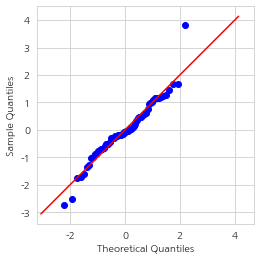

In [41]:
# Q-Q plot을 통한 정규분포성 검토
sm.qqplot(r.resid, fit=True, line='45')
plt.gca().axis("square")
plt.show()

In [42]:
# 정규성 검정
sp.stats.normaltest(r.resid)

NormaltestResult(statistic=9.112938679033483, pvalue=0.010499062206051558)

유의확률이 1% 수준으로 귀무가설을 기각할 수 있으므로 정규분포라고 볼 수 없다.

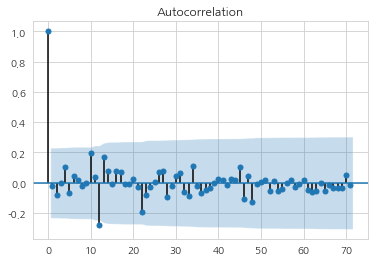

In [43]:
# 잔차의 샘플 자기상관계수함수 검토
sm.graphics.tsa.plot_acf(r.resid, lags=(len(df)-1))
plt.show()

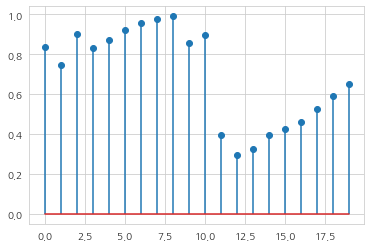

In [44]:
# Ljung-Box 검정
qvalue, pvalue = sm.stats.acorr_ljungbox(r.resid, 20)
plt.stem(pvalue, use_line_collection=True)
plt.show()

In [46]:
# 시차 20까지 유의확률이 50% 이상이므로 귀무가설 기각이 가능하다.